# 1️⃣ Project Setup and Metrics Definition

***

### 🎯 **Goal:** Define the key performance indicators (KPIs) and metrics we need to calculate to address the business questions of the 'HajarAsas' project. We load the final clean data and prepare our visualization libraries.

### **Key Metrics to Calculate:**
1.  **Opex Concentration:** Percentage of total Opex consumed by the top category.
2.  **CapEx vs. Opex Ratio:** Comparison of total investment (Capital) against total operational costs.

In [1]:
## 1. Setup and Load Final Clean Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For plotting
import seaborn as sns         # For enhanced visualizations

# Set plotting style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# Define paths to the final cleaned files
OPERATING_EXPENSES_PATH = "../1_datasets/processed/operating-expenses_cleaned_final.csv"
CAPITAL_PATH = "../1_datasets/processed/capital_cleaned_final_V2.csv"

# Load the DataFrames
try:
    df_exp = pd.read_csv(OPERATING_EXPENSES_PATH)
    df_cap = pd.read_csv(CAPITAL_PATH)
    print("✅ Data loaded for analysis and visualization setup complete.")
except FileNotFoundError as e:
    print(f"❌ Error loading file: {e}. Please check the paths.")

✅ Data loaded for analysis and visualization setup complete.


# 2️⃣ Operational Efficiency Analysis

***

### 🔍 **Goal:** Identify the most dominant operational costs. We calculate the sum of expenses per category and then determine what percentage the top category represents relative to the total operational expenditure. This highlights potential areas for immediate cost reduction.

In [2]:
## 2. Operational Efficiency Analysis

# Calculate Total Opex
total_opex = df_exp['Price / Amount'].sum()

# Calculate Opex by Category
opex_by_category = df_exp.groupby('Category')['Price / Amount'].sum().sort_values(ascending=False)

# Calculate Percentage Contribution for each category
category_contribution = (opex_by_category / total_opex) * 100

# Top Opex Category and its Contribution
top_category = category_contribution.index[0]
top_contribution = category_contribution.iloc[0]

print("--- 2.1. Opex Concentration and Contribution ---")
print(f"Total Operational Expenditure (Opex): ${total_opex:,.2f}")
print(f"Top Opex Category: **{top_category}**")
print(f"Contribution of Top Category to Total Opex: **{top_contribution:,.2f}%**")

print("\n--- 2.2. Full Category Contribution List (%) ---")
print(category_contribution.round(2).to_string())

--- 2.1. Opex Concentration and Contribution ---
Total Operational Expenditure (Opex): $6,205,352.00
Top Opex Category: **Rent**
Contribution of Top Category to Total Opex: **31.10%**

--- 2.2. Full Category Contribution List (%) ---
Category
Rent                31.10
Name/Person         26.99
Equipment           25.55
Material            13.28
Miscellaneous        3.06
Utilities/Fuel       0.01
Parts & Supplies     0.01
Labor & Services     0.00


# 2.3. 📊 Visualization: Operating Expenses by Category

***

### 📈 **Insight:** A **Bar Chart** visually represents the distribution of operational costs across different categories. This immediately highlights which areas consume the most budget, making it easier to identify cost-saving opportunities.

## 2.3. Visualization: Operating Expenses by Category

plt.figure(figsize=(12, 7))
sns.barplot(x=opex_by_category.index, y=opex_by_category.values, palette='viridis')
plt.title('Total Operating Expenses by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Price / Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# 3️⃣ Monthly Expense Trend

***

### 📅 **Goal:** Analyze spending over time. By aggregating expenses monthly, we can detect any sudden spikes, seasonal changes, or unexpected **Outliers**. This forms the basis for accurate financial forecasting.

In [3]:
## 3. Monthly Expense Trend

# Ensure Date column is in datetime format and extract the Month
df_exp['Date'] = pd.to_datetime(df_exp['Date'], errors='coerce')
df_exp['Month'] = df_exp['Date'].dt.month

# Group spending by month
monthly_spending = df_exp.groupby('Month')['Price / Amount'].sum().sort_index()

# Display monthly changes
print("--- 3.1. Total Spending per Month ---")
print(monthly_spending.to_string())

# Identify maximum spending month
max_month = monthly_spending.idxmax()
max_amount = monthly_spending.max()
print(f"\nMonth with MAX Spending: Month {max_month} (${max_amount:,.2f})")

--- 3.1. Total Spending per Month ---
Month
6.0    2451000.0
7.0    3040394.0
8.0     709734.0
9.0         37.0

Month with MAX Spending: Month 7.0 ($3,040,394.00)


# 3.2. 📊 Visualization: Monthly Operating Expenses Trend

***

### 📉 **Insight:** A **Line Plot** effectively visualizes spending patterns over time. This helps in identifying trends, periods of high or low expenditure, and the impact of specific events (e.g., initial setup costs) on monthly cash flow.

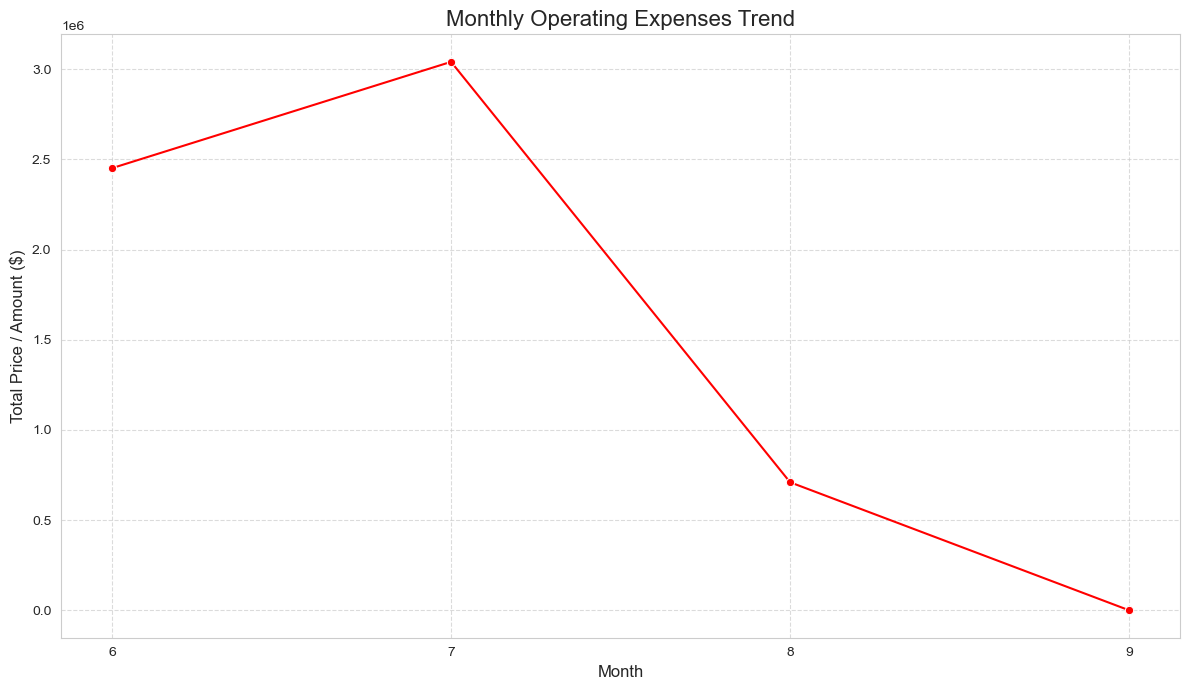

In [4]:
## 3.2. Visualization: Monthly Operating Expenses Trend

plt.figure(figsize=(12, 7))
sns.lineplot(x=monthly_spending.index, y=monthly_spending.values, marker='o', color='red')
plt.title('Monthly Operating Expenses Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Price / Amount ($)', fontsize=12)
plt.xticks(list(monthly_spending.index)) # Ensure all months are shown
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4️⃣ Unified Spending Ratio: **CapEx vs. Opex**

***

### ⚖️ **Goal:** Compare the total long-term investment (CapEx) against the total short-term operational costs (Opex). This ratio helps management understand the overall financial focus in the project's initial phase. A high CapEx ratio is expected for a new factory.

In [5]:
## 4. Unified Spending Ratio Analysis

# Calculate Total CapEx (sum of priced assets only)
total_capex = df_cap['Price'].sum()

# Calculate CapEx to Opex Ratio
if total_opex > 0:
    capex_to_opex_ratio = total_capex / total_opex
else:
    capex_to_opex_ratio = np.nan

print("--- 4.1. Total Spending Summary ---")
print(f"Total Capital Investment (CapEx): ${total_capex:,.2f}")
print(f"Total Operational Expenditure (Opex): ${total_opex:,.2f}")

print("\n--- 4.2. CapEx to Opex Ratio ---")
print(f"CapEx to Opex Ratio: **{capex_to_opex_ratio:,.2f}**")
print(f"\nInterpretation: For every $1.00 spent on operations, ${capex_to_opex_ratio:,.2f} was invested in long-term assets.")

--- 4.1. Total Spending Summary ---
Total Capital Investment (CapEx): $60,568.80
Total Operational Expenditure (Opex): $6,205,352.00

--- 4.2. CapEx to Opex Ratio ---
CapEx to Opex Ratio: **0.01**

Interpretation: For every $1.00 spent on operations, $0.01 was invested in long-term assets.


# 4.3. 📊 Visualization: CapEx vs. Opex Breakdown

***

### 🔄 **Insight:** A **Pie Chart** (or Bar Chart) provides a clear and immediate visual breakdown of how the total financial outlay is split between capital investments and recurring operational costs. This is crucial for understanding the overall financial strategy of a new venture.

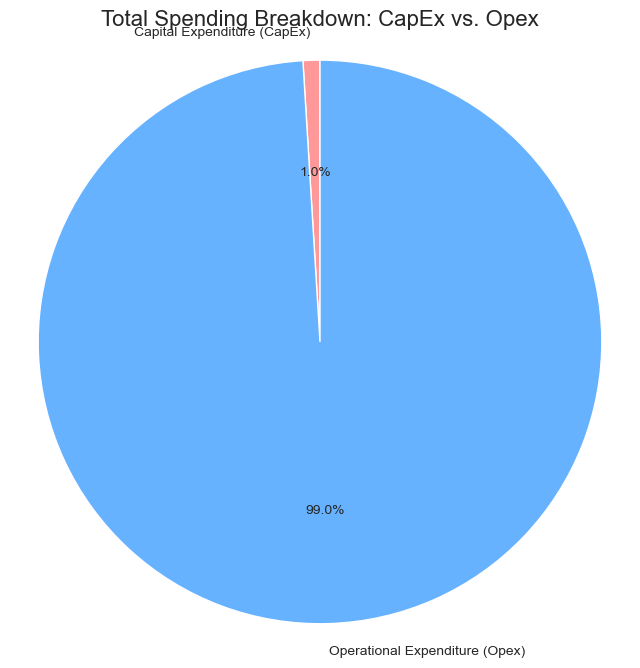

In [6]:
## 4.3. Visualization: CapEx vs. Opex Breakdown

# Prepare data for pie chart
spending_breakdown = pd.Series({
    'Capital Expenditure (CapEx)': total_capex,
    'Operational Expenditure (Opex)': total_opex
})

plt.figure(figsize=(8, 8))
plt.pie(spending_breakdown, labels=spending_breakdown.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Total Spending Breakdown: CapEx vs. Opex', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 5️⃣ Conclusion and Recommendations

***

### 📝 **Goal:** Translate the calculated metrics and visualized insights into clear, actionable business recommendations for the 'HajarAsas' block factory management.

### **Recommendations Structure:**
1.  **Cost Control Priority:** Based on Opex Concentration.
2.  **Investment Focus:** Based on CapEx vs. Opex Ratio.
3.  **Data Quality Action:** Addressing the high number of missing prices in Capital assets.

In [7]:
## 5. Conclusion and Recommendations

# Use the calculated metrics from above (total_opex, total_capex, top_category, top_contribution, capex_to_opex_ratio)

print("--- 5.1. Recommendation for Cost Control ---")
print(f"The **{top_category}** category is the primary driver of operational costs, consuming {top_contribution:,.2f}% of the total Opex.")
print("Recommendation: Implement strict vendor management and look for competitive pricing/suppliers specifically for this category to maximize savings.")

print("\n--- 5.2. Recommendation for Investment Balance ---")
print(f"The CapEx to Opex ratio is {capex_to_opex_ratio:,.2f}.")
if capex_to_opex_ratio > 1.0:
    print("Interpretation: The project is currently focused heavily on establishment and asset acquisition (High CapEx), which is typical and healthy for a new factory. Continue monitoring CapEx to ensure planned investments are on track.")
else:
    print("Interpretation: Operational costs are currently outpacing asset acquisition. Management should review if essential capital purchases are still pending, or if unexpected Opex spikes occurred.")

print("\n--- 5.3. Data Quality Recommendation ---")
print(f"Action required: {df_cap['Price'].isnull().sum()} assets currently lack a recorded price. Assign prices to these assets immediately to ensure accurate asset valuation and total CapEx calculation, providing a clearer picture of total investment.")

--- 5.1. Recommendation for Cost Control ---
The **Rent** category is the primary driver of operational costs, consuming 31.10% of the total Opex.
Recommendation: Implement strict vendor management and look for competitive pricing/suppliers specifically for this category to maximize savings.

--- 5.2. Recommendation for Investment Balance ---
The CapEx to Opex ratio is 0.01.
Interpretation: Operational costs are currently outpacing asset acquisition. Management should review if essential capital purchases are still pending, or if unexpected Opex spikes occurred.

--- 5.3. Data Quality Recommendation ---
Action required: 115 assets currently lack a recorded price. Assign prices to these assets immediately to ensure accurate asset valuation and total CapEx calculation, providing a clearer picture of total investment.
